# CHAPTER 2 자연어와 단어의 분산 표현

## 2.1 자연어 처리란

자연어(natural language) : 우리가 평소에 쓰는 말  
자연어 처리(Natural Language Processing, NLP) : 우리의 말을 컴퓨터에게 이해시키기 위한 기술(분야)  
  
자연어 처리 예 :  
검색 엔진, 기계번역, 질의응답 시스템, IME(입력기 전환), 문장 자동요약과 감정분석 등  
우리 주변에는 이미 자연어 처리 기술이 널리 사용되고 있음

### 2.1.1 단어의 의미

말의 의미는 '단어'로 구성됨  
다시 말해, 단어는 의미의 최소 단위  
  
컴퓨터에게 '단어의 의미'를 이해시키기 위해 '단어의 의미'를 잘 파악하는 표현 방법  
- 시소러스를 활용한 기법
- 통계 기반 기법
- 추론 기반 기법(word2vec)

## 2.2 시소러스

시소러스 : 유의어 사전  
'뜻이 같은 단어(동의어)'나 '뜻이 비슷한 단어(유의어)'가 한 그룹으로 분류되어 있음  
(사람이 직접 단어의 의미를 정의하는 방식)  
    
<img src='./img/2/thesaurus_1.png' width=300>  

또한 자연어 처리에 이용되는 시소러스는 단어 사이의 '상위와 하위' 혹은 '전체와 부분' 등의 관계를 정의함  
위 그림의 예시처럼 각 단어의 관계를 그래프로 정의함  
이 '단어 네트워크'를 이용하여 컴퓨터에게 단어 사이의 관계를 가르칠 수 있음

### 2.2.1 WordNet

WordNet : 프린스턴 대학교에서 1985년부터 구축한 전통 있는 시소러스  
자연어 처리 부냥에서 가장 유명한 시소러스이며, 이를 사용하여 유의어를 얻거나 '단어 네트워크'를 이용하여 단어 사이의 유사도를 구할 수 있음  
  
(부록 B. WordNet 맛보기 참고)

### 2.2.2 시소러스의 문제점

시소러스 방식의 대표적인 문제점들
- 시대 변화에 대응하기 어렵다.
    단어는 때때로 새롭게 생겨나기도 하고, 잊혀지기도 하며, 시대에 따라 언어의 의미가 변하기도 함  
    이런 단어에 대응하려면 시소러스를 사람이 수작업으로 끊임없이 갱신해야 함
- 시소러스를 만드는데 엄청난 인적 비용 발생
- 단어의 미묘한 차이를 표현할 수 없다.  
  
위와 같이 시소러스를 사용하는 기법(단어의 의미를 사람이 정의하는 기법)에는 큰 문제들이 있어,  
사람의 개입을 최소로 줄이고 텍스트 데이터만으로 원하는 결과를 얻어내는 방향으로 패러다임이 바뀌고 있음

## 2.3 통계 기반 기법

말뭉치(corpus) : 자연어 처리 연구나 애플리케이션을 염두에 두고 수집된 대량의 텍스트 데이터  
  
말뭉치에는 자연어에 대한 사람의 '지식'이 담겨 있으며,  
통계 기반 기법의 목표는 이처럼 사람의 지식으로 가득한 말뭉치에서 자동으로, 그리고 효율적으로 그 핵심을 추출하는 것

### 2.3.1 파이썬으로 말뭉치 전처리하기

텍스트 데이터(말뭉치) 전처리 :  
데이터를 단어로 분할하고 그 분할된 단어들을 단어 ID 목록으로 변환

In [1]:
text = 'You say goodbye and I say hello.'

1. text를 단어 단위로 분할  
    - lower() 메서드로 모든 문자를 소문자로 변환
    - 마침표 앞에 공백을 삽입
    - split() 메서드로 공백을 기준으로 분할  

In [2]:
text = text.lower()
text = text.replace('.',' .')
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

2. 단어에 ID를 부여하고 단어 ID와 단어를 짝지어주는 대응표 작성

In [3]:
word_to_id = {} # 단어에서 단어 ID로의 변환 담당(키 : 단어, 값 : 단어 ID)
id_to_word = {} # 단어 ID에서 단어로의 변환 담당(키 : 단어 ID, 값 : 단어)

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [4]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [5]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [6]:
id_to_word[1]

'say'

In [7]:
word_to_id['hello']

5

3. '단어 목록'을 '단어 ID 목록'으로 변경

In [8]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [9]:
# 정리

def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')
    
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
            
    corpus = np.array([word_to_id[w] for w in words])
    
    return corpus, word_to_id, id_to_word

In [10]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

### 2.3.2 단어의 분산 표현

색(color)의 경우,  
'코발트블루'나 '싱크레드' 같은 고유한 이름으로 표현할 수 있고,  
RGB(Red/Green/Blue)라는 세 가지 성분이 어떤 비율로 섞여 있는지 3차원 벡터로 표현할 수도 있음  
둘 중 RGB 같은 벡터 표현이 색을 더 정확하게 명시할 수 있음  
또한, 색끼리의 관련성(비슷한 색인지 여부 등)도 벡터 표현이 더 쉽게 판단할 수 있고, 정량화하기도 쉬움  
  
이처럼 단어도 벡터로 표현하는 것,  
즉, '단어의 의미'를 정확하게 파악할 수 있는 벡터 표현을 단어의 __분산 표현(distributional representation)__이라고 함  
  
\* 단어의 분산표현은 단어를 고정 길이의 밀집벡터(dense vector)로 표현함  
밀집벡터는 대부분의 원소가 0이 아닌 실수인 벡터를 말함

### 2.3.3 분포 가설

__분포 가설(distributional hypothesis)__ : '단어의 의미는 주변 단어에 의해 형성된다'  
단어 자체에는 의미가 없고, 그 단어가 사용된 '맥락(context)'이 의미를 형성한다.  
  
여기서, '맥락'이란 특정 단어를 중심에 둔 그 주변 단어를 말함  
맥락의 크기(주변 단어를 몇 개나 포함할지)는 '윈도우 크기(window size)'라고 함

ex) 윈도우 크기가 2인 '맥락'의 예  
'goodbye'에 주목한다면, 그 좌우의 두 단어(총 네 단어)를 맥락으로 이용함

<img src='./img/2/context_1.png' width=300>

### 2.3.4 동시발생 행렬

분포 가설에 기초해 단어를 벡터로 나타내는 방법  
  
  
통계기반(statistical based) 기법 : 어떤 단어에 주목했을 때, 그 주변에 어떤 단어가 몇 번이나 등장하는지를 세어 집계하는 방법

In [11]:
import numpy as np
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)

[0 1 2 3 4 1 5 6]


In [12]:
print(id_to_word)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


* 단어 ID가 0인 'you'의 맥락에 포함되는 단어의 빈도표  
  
<img src='./img/2/context_2.png' width=500>  
  
이를 바탕으로 'you'라는 단어를 [0,1,0,0,0,0,0]이라는 벡터로 표현할 수 있다.  
  
* 단어 ID가 1인 'say'의 맥락에 포함되는 단어의 빈도표  
  
<img src='./img/2/context_3.png' width=500>  
  
* 모든 단어에 대해 동시발생하는 단어  
  
<img src='./img/2/context_4.png' width=500>  
  
위 표의 각 행은 해당 단어를 표현한 벡터가 됨  
이 표가 행렬의 형태를 띤다는 뜻에서 __동시발생 행렬(co-occurrence matrix)__라고 함

In [13]:
# 동시발생 행렬
C = np.array([
    [0,1,0,0,0,0,0],
    [1,0,1,0,1,1,0],
    [0,1,0,1,0,0,0],
    [0,0,1,0,1,0,0],
    [0,1,0,1,0,0,0],
    [0,1,0,0,0,0,1],
    [0,0,0,0,0,1,0]
], dtype=np.int32)

In [14]:
print(C[0]) # ID가 0인 단어의 벡터 표현
print(C[4]) # ID가 4인 단어의 벡터 표현
print(C[word_to_id['goodbye']]) # 'goodbye'의 벡터 표현

[0 1 0 0 0 0 0]
[0 1 0 1 0 0 0]
[0 1 0 1 0 0 0]


이처럼 동시발생 행렬을 활용하면 단어를 벡터로 나타낼 수 있음

In [15]:
# 말뭉치로부터 동시발생 행렬을 만들어주는 함수 구현

def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size+1):
            left_idx = idx - i
            right_idx = idx + i
            
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix

In [16]:
create_co_matrix(corpus, vocab_size=7)

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

### 2.3.5 벡터 간 유사도

단어 벡터의 유사도를 나타낼 때는 __코사인 유사도(cosine similarity)__를 자주 이용  
  
ex) 두 벡터 $x=(x_1, x_2, \cdots, x_n)$과 $y=(y_1, y_2, \cdots, y_n)$가 있다면, 코사인 유사도는 다음과 같음  
  
$similarity(x,y)=\frac{x\cdot y}{\parallel x\parallel\parallel y\parallel}$  
  
분자는 벡터의 내적, 분모는 각 벡터의 노름(norm)임, 벡터를 정규화하고 내적을 구함  
노름은 벡터의 크기를 나타낸 것으로, 여기선 'L2 노름(벡터의 각 원소를 제곱해 더한 후 다시 제곱근을 구해 계산)'을 계산함   
  
코사인 유사도는 두 벡터가 가리키는 방향이 얼마나 비슷한가를 의미  
두 벡터의 방향이 완전히 같다면 코사인 유사도가 1이 되며, 완전히 반대라면 -1이 됨

In [17]:
def cos_similarity(x, y):
    nx = x / np.sqrt(np.sum(x**2)) # x의 정규화
    ny = y / np.sqrt(np.sum(y**2)) # y의 정규화
    return np.dot(nx, ny)

위 구현은 인수로 제로 벡터(원소가 모두 0인 벡터)가 들어오면 'divide by zero' 오류가 발생함  
이 문제를 해결하기 위해 분모에 작은 값인 eps(epsilon)을 더해줌

In [18]:
# 코사인 유사도 구현
def cos_similarity(x, y, eps=1e-8):
    nx = x / (np.sqrt(np.sum(x**2)) + eps) # x의 정규화
    ny = y / (np.sqrt(np.sum(y**2)) + eps) # y의 정규화
    return np.dot(nx, ny)

In [19]:
# 'you'와 'i'의 유사도 구하기
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']] # 'you'의 단어 벡터
c1 = C[word_to_id['i']] # 'i'의 단어 벡터
print(cos_similarity(c0, c1)) # 코사인 유사도

0.7071067691154799


### 2.3.6 유사 단어의 랭킹 표시

검색어가 주어지면, 그 검색어와 비슷한 단어를 유사도 순으로 출력하는 함수(most_similar()) 구현  
  
most_similar() 함수의 인수
- query : 검색어(단어)
- word_to_id : 단어에서 단어 ID로의 딕셔너리
- id_to_word : 단어 ID에서 단어로의 딕셔너리
- word_matrix : 단어 벡터들을 한데 모은 행렬
- top : 상위 몇 개까지 출력할지 설정

In [20]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    # 1. 검색어를 꺼냄
    if query not in word_to_id:
        print('%s(을)를 찾을 수 없습니다.' % query)
        return
    
    print('\n[query]'+query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    # 2. 코사이 유사도 계산
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    # 3. 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort(): # argsort() 배열의 원소를 오름차순 정렬 후 인덱스를 반환
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))
        
        count += 1
        if count >= top:
            return

In [21]:
# 'you'를 검색어로 지정해 유사한 단어 출력

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query]you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


말뭉치의 크기가 너무 작아 결과가 썩 좋지는 않음🙄

## 2.4 통계 기반 기법 개선하기

### 2.4.1 상호정보량

동시발생 행렬의 원소는 두 단어가 동시에 발생한 횟수를 나타냄  
  
하지만 예를 들어 'car'이라는 단어는,  
'the'라는 단어가 더 관련이 깊은 'drive'라는 단어보다 동시발생 횟수가 많을 수 있음  
이런 경우, 단순히 등장 횟수만을 보면 'car'는 'drive'보다 'the'와의 관련성이 훨씬 강하다고 나오게 됨  
'the'가 고빈도 단어라서 'car'와 강한 관련성을 갖는다고 잘못 평가될 수 있음  
  
따라서, __점별 상호정보량(Pointwise Mutual Information, PMI)__라는 척도를 사용함  
  
PMI는 확률 변수 x와 y에 대해 다음 식으로 정의  
  
$PMI(x,y)=log_2frac{P(x,y)}{P(x)P(y)}$  
  
- P(x) : x가 일어날 확률
- P(y) : y가 일어날 확률
- P(x,y) : x와 y가 동시에 일어날 확률  
  
PMI 값은 높을수록 관련성이 높다는 의미  
  
  
동시발생 행렬(각 원소는 동시발생한 단어의 횟수)을 사용하여 PMI를 구하면,  
  
$PMI(x,y)=log_2\frac{P(x,y)}{P(x)P(y)}=log_2\frac{\frac{C(x,y)}{N}}{\frac{C(x)}{N}\frac{C(y)}{N}}=log_2\frac{C(x,y)\cdot N}{C(x)C(y)}$  
  
- C(x), C(y) : 각각 단어 x, y의 등장 횟수
- C(x,y) : 단어 x와 y가 동시발생하는 횟수  
  
위와 같이 동시발생 행렬로부터 PMI를 구할 수 있음  
단어가 단독으로 출현하는 횟수를 고려함  
  
하지만, 두 단어의 동시발생 횟수가 0이면 $log_20=-\infty$가 됨  
이 문제를 해결하기 위해 실제 구현할 때는 __양의 상호정보량(Positive PMI, PPMI)__를 사용함  
  
$PPMI(x,y)=max(0,PMI(x,y))$  
  
PMI가 음수일 때는 0으로 취급  
단어 사이의 관련성을 0이상의 실수로 나타냄.

In [22]:
def ppmi(C, verbose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i,j] * N / (S[j] * S[i]) + eps)
            M[i,j] = max(0, pmi)
            
            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print('%.1f%% 완료' % (100*cnt/total))
        
    return M

In [23]:
import numpy as np

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3) # 유효 자릿수를 세 자리로 표시
print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


PPMI 행렬의 각 원소는 0 이상의 실수임  
  
PPMI의 단점  
- 말뭉치의 어휘 수가 증가함에 따라 각 단어 벡터의 차원수도 증가  
- 행렬의 원소 대부분이 0
    각 원소의 '중요도'가 낮음  
    이런 벡터는 노이즈에 약하고 견고하지 못함  
  
이를 해결하는 기법은 벡터의 '차원 감소'

### 2.4.2 차원 감소

차원 감소(dimensionality reduction) : 벡터의 차원을 '중요한 정보'는 최대한 유지하면서 줄이는 방법  
  
<img src='./img/2/SVD_1.png' width=500>

차원 감소는 데이터의 분포를 고려해 중요한 '축'을 찾는 일을 수행함  
  
왼쪽 그림은 데이터점들을 2차원 좌표에 표시한 모습이고, 오른쪽 그림은 새로운 축을 도입하여 똑같은 데이터를 좌표축 하나만으로 표시한 모습
오른쪽 그림처럼 새로운 축을 찾을 때는 데이터가 넓게 분포되도록 고려해야 함  
각 데이터 점의 값은 새로운 축으로 사영된 값으로 변함  

여기서 중요한 것은 1차원 값만으로 데이터의 본질적인 차이를 구별할 수 있어야 함  
  
차원을 감소시키는 방법 중 __특잇값분해(Singular Value Decomposition, SVD)__는 임의의 행렬을 세 행렬의 곱으로 분해하며, 수식은 다음과 같다.  
  
$X=USV^T$  
  
위 식과 같이 SVD는 임의의 행렬 X를 U, S, V라는 세 행렬의 곱으로 분해함  
  
  
<img src='./img/2/SVD_2.png' width=500>  
  
여기서, __U__와 __V__는 직교행렬(orthogonal matrix)이고, 그 열벡터는 서로 직교함  
__U__는 어떠한 공간의 축(기저)를 형성하며, '단어 공간'으로 취급할 수 있음  
  
__S__는 대각행렬(diagonal matrix, 대각성분 외에는 모두 0인 행렬)로, 그 대각성분에는 '특잇값(singular value)'이 큰 순서로 나열되어 있음  
특잇값이란 '해당 축'의 중요도라고 간주할 수 있음  
따라서, 행렬 S에서 특잇값이 작다면 중요도가 낮다는 뜻으로, 행렬 __U__에서 여분의 열벡터를 깎아내어 원래의 행렬을 근사할 수 있음  
  
<img src='./img/2/SVD_3.png' width=500>  
  
단어의 PPMI 행렬에 이를 적용하면,  
행렬 X의 각 행에는 해당 단어 ID의 단어 벡터가 저장되고,  
그 단어 벡터가 행렬 __U'__라는 차원 감소된 벡터로 표현됨

< 참고 >  
  
- 단위 행렬(Identity Matrix)  
    단위 행렬은 주 대각선의 원소가 모두 1이며 나머지 원소는 모두 0인 정사각행렬  
    보통 줄여서 대문자 I로 표현하기도 함  
  
$2\times 2$ 단위행렬 $I=\begin{pmatrix}1 & 0 \\ 0 & 1 \end{pmatrix}$  
  
$3\times 3$ 단위행렬 $I=\begin{pmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}$  
  
  
- 역행렬(Inverse Matrix)  
    행렬 A와 행렬 B를 곱한 결과로 단위 행렬이 나온다면, 행렬 B를 행렬 A의 역행렬이라고 하며 $A-1$라고 표현함  
    
    
- 직교 행렬(Orthogonal Matrix)  
    $A\times A^T=I$와 $A^T\times A=I$를 만족하는 행렬 A를 직교 행렬이라고 함

### 2.4.3 SVD에 의한 차원 감소

In [24]:
import numpy as np
import matplotlib.pyplot as plt

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W) # linalg : 선형대수(linear algebra)의 약어

SVD에 의해 변환된 밀집벡터 표현은 변수 U에 저장됨

In [25]:
print(C[0]) # 동시발생 행렬
print(W[0]) # PPMI 행렬
print(U[0]) # SVD

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01 -1.110e-16 -3.886e-16 -1.205e-01 -9.323e-01  0.000e+00
 -1.800e-16]


위 밀집벡터의 차원을 감소시키려면,  
ex) 2차원 벡터로 줄이려면 처음 두 원소를 꺼내면 됨

In [26]:
print(U[0,:2])

[ 3.409e-01 -1.110e-16]


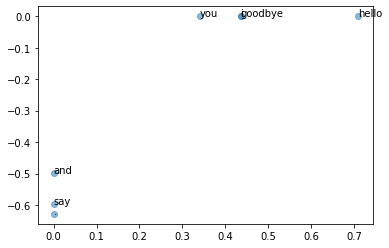

In [27]:
# 시각화
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
    
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

\* 행렬의 크기가 N이면 SVD 계산은 $N^3$이 걸림(계산량이 N의 세제곱에 비례해 늘어남)  
이는 현실적으로 감당하기 어려운 수준이므로, 특잇값이 작은 것은 버리는 방식인 Truncated SVD 같은 더 빠른 기법을 이용함

### 2.4.4 PTB 데이터셋

펜 트리뱅크(Penn Treebank, PTB) 데이터셋  
PTB 말뭉치는 word2vec의 발명자인 토마스 미콜로프의 웹 페이지에서 받을 수 있음  
  
이 예시에서 사용하는 PTB 데이터셋은 희소 단어를 <unk>로 대체 등의 몇 가지 전처리를 이미 해놓은 데이터셋

In [28]:
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print('word_to_id["car"]:', word_to_id["car"])
print('word_to_id["happy"]:', word_to_id["happy"])
print('word_to_id["lexus"]:', word_to_id["lexus"])

말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id["car"]: 3856
word_to_id["happy"]: 4428
word_to_id["lexus"]: 7426


### 2.4.5 PTB 데이터셋 평가

PTB 데이터셋에 통계 기반 기법을 적용  
  
구현 순서
1. 말뭉치를 사용해 맥락에 속한 단어의 등장 횟수를 센 후(동시발생 행렬)
2. PPMI 행렬로 변환하고,  
3. SVD를 이용해 차원을 감소시킨 후  
4. 유사도를 구함

In [29]:
import numpy as np
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')
W = ppmi(C, verbose=True)

print('SVD 계산 ...')
try:
    # truncated SVD
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                            random_state=None)
    
except ImportError:
    # SVD
    U, S, V = np.linalg.svd(W)
    
word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

동시발생 수 계산 ...
PPMI 계산 ...
1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
100.0% 완료
SVD 계산 ...

[query]you
 i: 0.6573092937469482
 we: 0.6389300227165222
 someone: 0.

단어의 의미 혹은 문법적인 관점에서 비슷한 단어들이 가까운 벡터로 나타났음  

-----------
# APPENDIX B WordNet 맛보기

## B.1 NLTK 설치

파이썬에서 WordNet을 이용하려면 NLTK(Natural Language Toolkit) 라이브러리를 사용

In [30]:
# NLTK 설치
!pip install nltk

In [31]:
import nltk

## B.2 WordNet에서 동의어 얻기

In [32]:
# wordnet 모듈 가져오기
from nltk.corpus import wordnet

In [33]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hyunjeongjo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/hyunjeongjo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

WordNet에는 각 단어가 synset이라는 동의어 그룹으로 분류되어 있음  
  
단어는 여러가지 의미가 존재할 수 있으므로, 동의어를 얻으려면 어느 의미에 해당하는지 명시해야 함

WordNet은 점(.)으로 구분된 3개의 원소로 이뤄진 표제어를 사용  
  
<img src='./img/2/wordnet_1.png' width=250>

In [35]:
# 'car'의 동의어
wordnet.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

$\rightarrow$ 'car'라는 단어에는 5개의 서로 다른 동의어 그룹이 정의되어 있음

In [36]:
# 'car.n.01'이 가리키는 동의어의 의미 확인
car = wordnet.synset('car.n.01')
car.definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

※ definition() 메서드는 주로 컴퓨터가 아닌 사람이 그 단어를 이해하고 싶을 때 이용

In [37]:
# 'car.n.01' 동의어 그룹에 있는 단어들 확인
car.lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

## B.3 WordNet과 단어 네트워크

In [38]:
# 'car.n.01'과 다른 단어와의 의미적인 상⋅하 관계 확인
car.hypernym_paths()[0]

[Synset('entity.n.01'),
 Synset('physical_entity.n.01'),
 Synset('object.n.01'),
 Synset('whole.n.02'),
 Synset('artifact.n.01'),
 Synset('instrumentality.n.03'),
 Synset('container.n.01'),
 Synset('wheeled_vehicle.n.01'),
 Synset('self-propelled_vehicle.n.01'),
 Synset('motor_vehicle.n.01'),
 Synset('car.n.01')]

hypernym : 주로 언어학에서 사용하는 단어로 '상위어(어떤 말보다 일반적이고 포괄적인 뜻이 있는 말)'라는 뜻  

WordNet을 구성하는 단어 네트워크는 위로 갈수록 추상적이고, 아래로 갈수록 구체적이 되도록 단어가 배치되어 있음

## B.4 WordNet을 사용한 의미 유사도

단어 사이의 유사도는 path_similarity() 메서드로 구함  
단어 사이의 유사도를 0~1 범위의 실수로 반환(높을수록 비슷함)

In [39]:
# 'car' 단어와 'novel', 'dog', 'motorcycle' 비교
car = wordnet.synset('car.n.01')
novel = wordnet.synset('novel.n.01')
dog = wordnet.synset('dog.n.01')
motorcycle = wordnet.synset('motorcycle.n.01')

car.path_similarity(novel)

0.05555555555555555

In [40]:
car.path_similarity(dog)

0.07692307692307693

In [41]:
car.path_similarity(motorcycle)

0.3333333333333333

<img src='./img/2/wordnet_2.png' width=400>  
<center>점선은 사이에 여러 단어가 존재함을 표현</center>

path_similarity() 메서드는 위 그림과 같이 단어 네트워크의 공통 경로를 바탕으로 단어 사이의 유사성을 계산  
  
이처럼 시소러스는 컴퓨터에 '단어의 의미'를 간접적으로 알려줄 수 있음